# A simple epidemic model for Covid 19 and its numerical solution
**André Massing**

Date: **March 26, 2021**

$\newcommand{mb}[1]{\mathbf{#1}}$
If you want to have a nicer theme for your jupyter notebook,
download the [cascade stylesheet file tma4125.css](https://www.math.ntnu.no/emner/TMA4125/2020v/part_II/notebooks/tma4125.css)
and execute the next cell:

In [1]:
from IPython.core.display import HTML
def css_styling():
    try:
        with open("tma4125.css", "r") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass #Do nothing

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

As always, we start by calling the necessary modules: And of course we want to import the required modules.


In [2]:
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, fixed
import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    
import matplotlib.pyplot as plt

# Use a funny plotting style
plt.xkcd()

newparams = {'figure.figsize': (6.0, 6.0),
             'axes.grid': True,
             'lines.markersize': 8, 
             'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

## Plan for the day

* Part I: Extension of the SIR model
* Part II: Numerical solution of SIR-like models

## Part I: Extending the SIR model for disease spreading



### Review of the SIR model

Motivated by the ongoing corona virus pandemic, we considered
the simplest ODE model describing how an an infectious disease spread in a population.

The model goes under the name [[SIR model]](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)
and a particular example of a **compartmental model in epidemiology**.
An overview over more complicated model can be for example found on [[wikipedia]]( https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#Elaborations_on_the_basic_SIR_model).

The SIR models divides the population into three
population classes or **compartments**, namely
* S(t): number individuals  **susceptible** for infection,
* I(t): number **infected** individuals, capable of transmitting the disease,
* R(t): number  **removed** individuals who cannot be infected due death or to immunity  
  after recovery

The model is of the spreading of a disease is based
on moving individual from $S$ to $I$ and then from $S$ to $R$, in short-hand notation

$$
S \to I \to R
$$

We assume a 
  * birth rate and rate of death not caused by Covid 19 can be neglected (no vital dynamics)
  * no incubation time, immediately transition from $S$ to $I$
  * large population so we model it $N, I, R$ as continuous functions 

Note that we then have that the total population/number of individuals $N(t)$ satisfies
$$
S(t) + I(t) + R(t) = N(t) = \mathrm{const}
$$
and we assume that we have rescaled the population number such that $N = 1$, so $I, S, R$ measures the proportion of susceptible, infectious and removed inviduals.

The final ODE system is given by

\begin{align}
S' &= - \beta S I
\\
I' &= \beta S I - \gamma I
\\
R' &= \gamma I,
\end{align}

where 

* $\beta$ denotes the **infection rate**, and
* $\gamma$ the **removal rate**. 

Having this ODE in mind, an epidemic model can be simply specified by writing
down a *state transition diagram*

$$
S \overset{\beta}{\to} I \overset{\gamma}{\to} R
$$

### A closer look at the derivation of the SIR model
We give a brief motivation for the SIR model following the presentation 
in [[Chapter 8.3]](https://link.springer.com/chapter/10.1007/978-3-030-16877-3_8https://link.springer.com/chapter/10.1007/978-3-030-16877-3_8) of
the book [[Programming for Computations - Python]](https://link.springer.com/book/10.1007/978-3-030-16877-3https://link.springer.com/book/10.1007/978-3-030-16877-3).

**Question**: How can we derive this model?

Starting from a number of susceptible inviduals $S(t)$ and infectious individuals $I(t)$
at some time $t$ we want to know how many susceptible inviduals get infected during 
a time interval $\Delta t$.

The change during this time interval  $\tau$ can be described a
\begin{align}
S(t+\Delta t) - S(t) = - \beta \Delta t S(t) I(t) 
\tag{1}
\label{eq} 
\end{align}
What is the meaning behind the right-hand side term of \eqref{eq}? 

 * First, we have a negative sign since $S$ is decreasing due to infections.
 

 * Second, the term $$ S(t)I(t).$$
   is simply the number of **all possible contact pairs** between susceptible and infectious 
   individuals.
   

 * Third the infection rate $\beta$ is composed of two factor $$ \beta = p \mu$$ where
   * $p$ is probality with which a $S$-$I$ actually occur per unit time interval, so $p \Delta t
     S(t)I(t)$ measures the number of **actual** contacts between susceptible and infectious 
   individuals. 
   * $\mu$ is the probabilty with which an $S$ individual gets infected during an $S$-$I$ contact

Thus the total number of people newly infected during the time period $\Delta t$ is thus $$\underbrace{\mu p \Delta}_{:=\beta} t S(t) I(t)$$ and therefore
$$
S(t+\Delta t) - S(t) = - \beta \Delta t S(t) I(t) \Leftrightarrow   - \beta S(t) I(t)
= \dfrac{S(t+\Delta t) - S(t)}{\Delta t} \to S'(t) \quad \text{for } \Delta t \to 0.
$$

### $R_0$ number and start of outbreaks

Looking at $$ I' = \beta S I - \gamma I$$ we see that an outbreak of a disease (read: increase of number of infections) can only occur
if $I'(0) > 0$, but this is of course equivalent to 
$$
0 < \beta S(0) I(0) - \gamma I(0) \Leftrightarrow \underbrace{\dfrac{\beta}{\gamma}}_{:=R_0} S(0) > 1 
$$

$$
 \dfrac{\beta}{\gamma} =: R_0
$$
is known as the  **basic reproduction number** and corresponds basically to the number of individuals infected by each infectious individual.

The $R_0$ can be affected by e.g. social distancing, (temporal) immunization, vaccination campaign etc. It also determines the treshold for flock immunity. If for instance the basic reproduction number is $2$, the fraction of susceptible individual should be less that $0.5$ to avoid
an outbreak in the presence of infected individuals.

### Breakout session (20 min)

1. **Warm-up discussion**: 
   * How many people have you met *physically* since Monday? 
   * How can *social distancing* be taken into account in SIR model? (The person in the group who has met the least number of people since Monday will be the appointed as group leader :)

2. **Challenge**: To prevent the collapse of our health care system, we need to predict the number of additional hospitalized patients (caused by Covid 19) at any point in time. Discuss in your group how to incorporate the dynamics of the fraction $H(t)$ of hospitalized patients into the SIR model to arrive at a $SIHR$ model. **Hint**: With which population category with $H$ interact? 

3. **Cool-down**: The SIR and even the SIHR model are very simplified models for diseaese spreading. Discuss possible effects/phenomena/parameters one might want to include in these models (e.g natural birth and death rates...) in a more accurate model. You can think of anything which somehow impact the population number or course of disease. Collect keywords on the [[mentimeter]](https://www.menti.com) word cloud, the group leader will quickly summarize (some) ideas.

#### Feeback: Discussion, ipad solution and mentimeter poll

* Draw state diagram A, B, C and perform poll
* Present final ODE model
* Activate word cloud and discuss extensions

## Part II: An adaptive Runge-Kutta method for the SIHR model

In this part we want to implement an adaptive Runge-Kutta method to solve the
extended $SIHR$ model numerically.

### Review:  Runge-Kutta methods

**Explicit** Runge-Kutta schemes are specified in the form of a **Butcher table**:

\begin{equation*}
\begin{array}{c|ccc}
c_1 & a_{11} & \cdots & a_{1s}
\\ 
\vdots & \vdots & & \vdots
\\ 
c_s & a_{s1} & \cdots & a_{ss}
\\ 
\hline
& b_1 & \cdots & b_s
\end{array}
\end{equation*}

with $c_1 = 0$ and $a_{ij} = 0$ for $j \geqslant i$.

So starting from $y_i, t_i$ and chosen step size $\tau_i$
the discrete solution at $t_{i+1}$ is computed as follows

* Compute stage derivatives $k_j$ for $j=1,\ldots,s$:
  \begin{equation*}
  k_{j} =
  f(t_i + c_j \tau, y_i +  \tau \sum_{l=1}^{j-1} {a}_{jl} k_l)
  \end{equation*}
* Compute the next time step via
  \begin{equation*}  
  y_{i+1} = y_{i} + \tau \sum_{j=1}^s b_j k_j
  \end{equation*}

In [3]:
class ExplicitRungeKutta:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def __call__(self, y0, t0, T, f, Nmax):
        # Extract Butcher table
        a, b, c = self.a, self.b, self.c
        
        # Stages
        s = len(b)
        ks = [np.zeros_like(y0, dtype=np.double) for s in range(s)]

        # Start time-stepping
        ys = [y0]
        ts = [t0]
        dt = (T - t0)/Nmax
        
        while(ts[-1] < T):
            t, y = ts[-1], ys[-1]
            
            # Compute stages derivatives k_j
            for j in range(s):
                t_j = t + c[j]*dt
                dY_j = np.zeros_like(y, dtype=np.double)
                for l in range(j):
                    dY_j += a[j,l]*ks[l]

                ks[j] = f(t_j, y + dt*dY_j)
                
            # Compute next time-step
            dy = np.zeros_like(y, dtype=np.double)
            for j in range(s):
                dy += b[j]*ks[j]
            
            ys.append(y + dt*dy)
            ts.append(t + dt)
            
        return (np.array(ts), np.array(ys))

**Usage example** 

We use the class above to create a Runge-Kutta solver based on Heun's method
which is specified by 
\begin{equation*}
  \begin{array}{c|cc}
   0 & 0 & 0 \\ 
      1 & 1 & 0 
        \\ 
      \hline 
      & \frac{1}{2} & \frac{1}{2} 
\end{array}
\end{equation*}
and the ODE
$$
y' = \lambda y
$$

In [4]:
# Define Butcher table for Heun
a = np.array([[0,   0],
              [1., 0]])
b = np.array([1/2, 1/2.])
c = np.array([0., 1])

# Create a new Runge Kutta solver
rk2 = ExplicitRungeKutta(a, b, c)

# Initial time, stop time
t0, T = 0, 1

# Initial value
y0 = 1

# Number of steps
Nmax = 10

# rhs of IVP
lam = 1
f = lambda t,y: lam*y

# solver can be simply called as function:
ts, ys = rk2(y0, t0, T, f, Nmax)

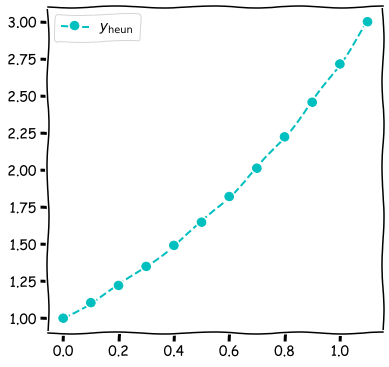

In [5]:
plt.plot(ts, ys, "c--o", label="$y_{\mathrm{heun}}$")
plt.legend()

### Review: Runge-Kutta method with stepsize control

Given $t_n, \mb{y}_n$ and a step size $\tau_n$. 
* Do one step with the method of choice, and find an error estimate $\mb{le}_{n+1}$. 

* if  $\|\mb{le}\|_{n+1} < \text{Tol}$

    * Accept the solution $t_{n+1}, \mb{y}_{n+1}$.

    * If possible, use increased step size $\tau_{n+1} := \tau_{new}$ for the next step.

* else

    * Repeat the step from $(t_n,\mb{y}_n)$ with a reduced step size $\tau_n := \tau_{new}$.

In both cases the the new time-step suggestion $\tau_{new}$ is computed by
$$
\tau_{new} \approx  \mathrm{fac} \left( \frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \right)^{\frac{1}{p+1}} \tau _{n}.
$$
where $\mathrm{fac} = 0.8$ is a safety factor.

A Runge - Kutta methods with an error estimate are usually called **embedded Runge - Kutta methods** or **Runge - Kutta pairs**, and
the coefficients can be written in a Butcher tableau as follows

$$
\begin{array}{c|ccccl}
    c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\ 
    c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\ 
    \vdots & \vdots &&&\vdots \\ 
    c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
        & b_1 & b_2 & \cdots & b_s  & \qquad\text{Order $p$}\\ \hline
        & \widehat{b}_1 & \widehat{b_2} & \cdots & \widehat{b}_s  & \qquad\text{Order $\widehat{p}= p+1$}
   \end{array}.
$$
 

The error is simply estimated  by $$\| \mb{le}_{n+1}\|$$ with 
$$ \mb{le}_{n+1} = \tau_n\sum_{i=1}^s (\widehat{b}_i - b_i)\mb{k}_i.
$$

### Breakout session 2 (20 min): Implementing an adaptive Runge-Kutta solver
Now we ask you to 
* Extend the Runge-Kutta class to include adaptive time-stepping
* Run a first quick test using the example above: $y' = y$, $y(0)$ with the exact solution $y(t) = e^t$ with $tol=10^{-3}$ to see whether you get a meaningful result 

In [ ]:
import numpy as np
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt

class EmbeddedExplicitRungeKutta:
    # TODO: Extend __init__ so that it also takes in 'bhat' and 'order' as additional argument 
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        ...
        ...

    # TODO: Extend previous __call__ routine to take in toleranse tol as well:
    def __call__(self, y0, t0, T, f, Nmax):
        
        # TODO: Extract Butcher table and 
        a, b, c, bhat, order = ...
        
        # Stages
        s = len(b)
        ks = [np.zeros_like(y0, dtype=np.double) for s in range(s)]

        # Start time-stepping
        ys = [y0]
        ts = [t0]

        # TODO: What is a simple choice for the initial time step?
        dt = ...

        # Counting steps
        N = 0
        N_rej = 0
        
        while(ts[-1] < T and N < Nmax):
            t, y = ts[-1], ys[-1]
            N += 1

            # Compute stages derivatives k_j
            for j in range(s):
                t_j = t + c[j]*dt
                dY_j = np.zeros_like(y, dtype=np.double)
                for l in range(j):
                    dY_j += a[j,l]*ks[l]

                ks[j] = f(t_j, y + dt*dY_j)
                
            # Compute next time-step
            dy = np.zeros_like(y, dtype=np.double)
            for j in range(s):
                dy += b[j]*ks[j]
            
            # bhat was not given then fall back to a standard RKM witu uniform step size
            if bhat is None:
                ys.append(y + dt*dy)
                ts.append(t + dt)
            # TODO: 
            # Compute yhat or dyhat, estimate error, 
            # decide whether to accept step or not, compute new time step
            else:
                # TODO: Compute dyhat
                dyhat = ...
                
                
                # TODO: Error estimate, use norm() function for this
                err = ...

                # TODO: Accept time-step
                if err <= tol:
                    ...
                    ...
             
                else:
                    print(f"Step is rejected at t = {t} with err = {err}")
                    N_rej += 1
  
                # TODO: Compute New step size
                dt = ...
        
        print(f"Finishing time-stepping reaching t = {ts[-1]} with final time T = {T}")
        print(f"Used {N} steps out of {Nmax} with {N_rej} being rejected")
        
        return (np.array(ts), np.array(ys))

**Solution.**

In [6]:
import numpy as np
from numpy.linalg import norm, solve

class EmbeddedExplicitRungeKutta:
    def __init__(self, a, b, c,  bhat=None, order=None):
        self.a = a
        self.b = b
        self.c = c
        self.bhat = bhat
        self.order = order

    def __call__(self, y0, t0, T, f, Nmax, tol=1e-3):
        # Extract Butcher table
        a, b, c, bhat, order = self.a, self.b, self.c, self.bhat, self.order

        # pessisimistic factor used in the new time-step computation 
        fac = 0.8     
        # some more advanced parameters for better controlling of time-step choice for higher-order methods
        eps = 1e-15   # machine precision
        facmax = 5.0  # Maxima
        facmin = 0.1
        
        err  = 0
        
        # Stages
        s = len(b)
        ks = [np.zeros_like(y0, dtype=np.double) for s in range(s)]

        # Start time-stepping
        ys = [y0]
        ts = [t0]
        
        # Simple choice for initial time step
        dt = (T - t0)/Nmax
        # Counting steps
        N = 0
        N_rej = 0
        
        while(ts[-1] < T and N < Nmax):
            t, y = ts[-1], ys[-1]
            N += 1

            # Compute stages derivatives k_j
            for j in range(s):
                t_j = t + c[j]*dt
                dY_j = np.zeros_like(y, dtype=np.double)
                for l in range(j):
                    dY_j += a[j,l]*ks[l]

                ks[j] = f(t_j, y + dt*dY_j)
                
            # Compute next time-step
            dy = np.zeros_like(y, dtype=np.double)
            for j in range(s):
                dy += b[j]*ks[j]

            if bhat is None:
                ys.append(y + dt*dy)
                ts.append(t + dt)
            else:
                dyhat = np.zeros_like(y, dtype=np.double)
                for j in range(s):
                    dyhat += bhat[j]*ks[j]

                # Error estimate
                err = dt*norm(dy - dyhat)

                # Accept time-step
                if err <= tol:
                # ALTERNATIVE: more robust, activate this one for FEHLBERG
#                 if err <= tol + tol*norm(y):
                
                    ys.append(y + dt*dyhat)
                    ts.append(t + dt)
                else:
                    #print(f"Step is rejected at t = {t} with err = {err}")
                    N_rej += 1
                
                # Compute new step size
                dt = fac*(tol/err)**(1/(order+1))*dt
                # Decrease time-step further if we go beyond T
                dt = min(dt,abs(T-ts[-1]))
                # ALTERNATIVE: more robust, activate this one for FEHLBERG
#                 dt = min(dt*min(facmax, max(facmin, fac*(tol/err)**(1/(order+1)))),abs(T-ts[-1]))
        
        print(f"Finishing time-stepping reaching t = {ts[-1]} with final time T = {T}")
        print(f"Used {N} steps out of {Nmax} with {N_rej} being rejected")
          
        return (np.array(ts), np.array(ys))
    

**Test example 1:**
Solve
$$
y'(t) = y(t), \quad y(0) = 1
$$
until $T=1$ with 
and the Heun-Euler pair which is is given by
$$
\begin{array}{c|cc} 0 & & \\ 1 & 1 &   \\ \hline & 1 & 0 \\ \hline \displaystyle & \frac{1}{2} &  \frac{1}{2} 
 \end{array}
$$

In [7]:
## Test solver

# Initial time, stop time
t0, T = 0, 1
# Initial value
y0 = 1
# Number of steps
Nmax = 1000

# rhs of IVP
lam = 1
f = lambda t,y: lam*y

#Heun-Euler
a    = np.array([[0,   0],
                 [1., 0]])
bhat = np.array([1/2, 1/2.])
b    = np.array([1, 0.])
c = np.array([0., 1])
order = 1

# Run method
Nmax = 10000
tol = 1.0e-2
euler_heun = EmbeddedExplicitRungeKutta(a, b, c, bhat, order)
ts, ys = euler_heun(y0, t0, T, f, Nmax, tol)

Finishing time-stepping reaching t = 1.0 with final time T = 1
Used 12 steps out of 10000 with 0 being rejected


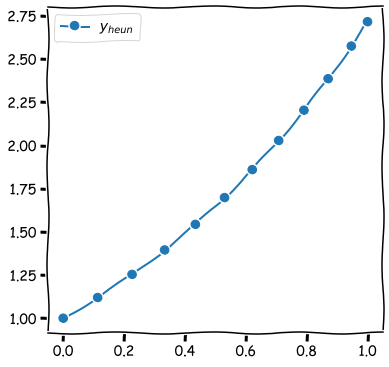

In [8]:
plt.close()
plt.plot(ts, ys, "-o", label="$y_{heun}$")
plt.legend()

### A SIR model class
Next, similar to the *ExplicitRungeKutta* class above, we will wrap the SIR model  
\begin{align}
S' &= - \beta  S I
\\
I' &= \beta S I - \gamma I
\\
R' &= \gamma I,
\end{align}
into a little SIR class of the following form:

In [9]:
class SIR:
    def __init__(self, beta, gamma):
        self.beta = beta # infectional rate
        self.gamma = gamma # removal rate
    
    def __call__(self, t, y):
        return np.array([-self.beta*y[0]*y[1],
                          self.beta*y[0]*y[1] - self.gamma*y[1],
                          self.gamma*y[1]])

To create a new SIR model for some given parameters, you instatiate an object as follows:

In [10]:
# Data for the SIR model
# denote basic reproduction number by r0
r0 = 2 
gamma = 1/18.
beta = r0*gamma

# Define a model
sir = SIR(beta=beta, gamma=gamma)

The ```sir``` object can now simply used as the right-hand side in our ODE solver, e.g. ```sir(t0, y0)```:

In [11]:
# Trondheim has 200.000 inhabitants we start with 1 infected person
I_0 = 1/200000
S_0 = 1 - I_0
R_0 = 0

y0 = np.array([S_0, 
               I_0,
               R_0])

t0, T = 0, 365 # days, we consider a whole year

# Illutrating how sir can be called like a function
print(sir(t0,y0))

[-5.55552778e-07  2.77775000e-07  2.77777778e-07]


Testing our ```EmbeddedExplicitRungeKutta``` solver using either the Heun-Euler defined by
$$
\begin{array}{c|cc} 0 & & \\ 1 & 1 &   \\ \hline & 1 & 0 \\ \hline \displaystyle & \frac{1}{2} &  \frac{1}{2} 
 \end{array}
$$
or 
the
embedded Runge-Kutta 4(3) variant
due to **Fehlberg**:
$$
\begin{array}{c|ccccc}
      0 & 0 & 0 & 0 & 0 & 0
      \\ 
      \frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 & 0
      \\ 
      \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 & 0
      \\
      1 &  0 & 0 & 1 & 0 & 0
      \\
      1 & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} & 0 
      \\
      \hline 
      & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & 0 & \frac{1}{6} 
      \\
     \hline 
      & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} & 0
\end{array}
$$

In [12]:
### NB: If your solver doesn't work just uncomment the next line
####    after you have fetched rkm.py      
# from rkm import EmbeddedExplicitRungeKutta

#Heun-Euler
a    = np.array([[0,   0],
                 [1., 0]])
bhat = np.array([1/2, 1/2.])
b    = np.array([1, 0.])
c = np.array([0., 1])
order = 1

# Run method
Nmax = 10000
tol = 1.0e-5
euler_heun = EmbeddedExplicitRungeKutta(a, b, c, bhat, order)
ts, ys = euler_heun(y0, t0, T, sir, Nmax, tol)

Finishing time-stepping reaching t = 365.0 with final time T = 365
Used 741 steps out of 10000 with 3 being rejected


Text(0, 0.5, 'Fraction of population')

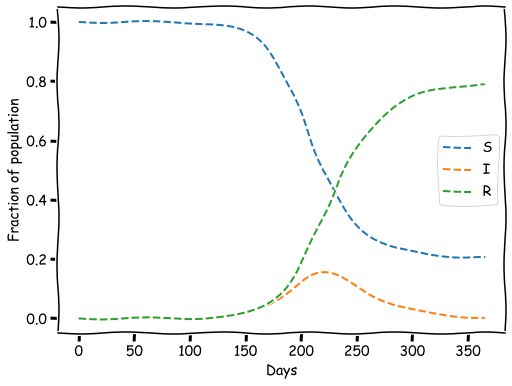

In [13]:
# Close previously interactive figures
plt.close()
newparams['figure.figsize'] = (8,6)
plt.rcParams.update(newparams)
plt.plot(ts, ys, "--")
plt.legend(["S", "I", "R"])
plt.xlabel("Days")
plt.ylabel("Fraction of population")

In [14]:
#Fehlberg method
a = np.array([[0.0, 0,   0,   0,   0],
              [1/2, 0,   0,   0,   0],
              [0, 1/2,   0,   0,   0],
              [0,   0,   1,   0,   0],
              [1/6, 1/3, 1/3, 1/6, 0]])
b =  np.array([1/6, 1/3, 1/3, 0, 1/6])
bhat = np.array([1/6, 1/3, 1/3, 1/6, 0])
c = np.array([0.,
               1/2,
               1/2,
               1,
               1])
p = 3
fehlberg = EmbeddedExplicitRungeKutta(a, b, c, bhat, p)

Finishing time-stepping reaching t = 365.0 with final time T = 365
Used 42 steps out of 10000 with 3 being rejected


Text(0, 0.5, 'Fraction of population')

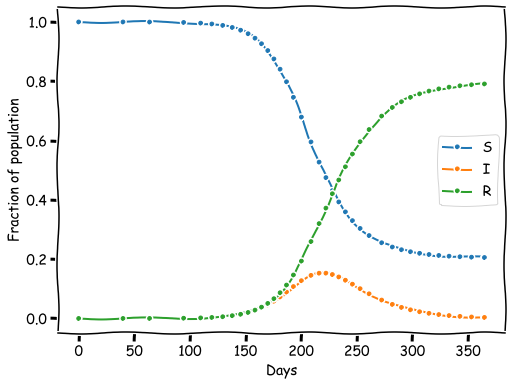

In [15]:
Nmax = 10000
tol = 1.0e-5
ts, ys = fehlberg(y0, t0, T, sir, Nmax, tol)
plt.close()
plt.plot(ts, ys, "-o", markersize=3)
plt.legend(["S", "I", "R"])
plt.xlabel("Days")
plt.ylabel("Fraction of population")

#### Final mentimeter if time permits

* For $R_0=2$, can you find the turning, i.e. when $I(t)$ starts to decrease? What is percentage of the population that got infected after a year?
* For $R_0=3$, can you find the turning? What is percentage of the population that got infected after a year?

In [16]:
# Close all interactive figures
plt.close("all")